In [1]:
# Import any relevant packages or libraries
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv("D:\VS_Code\waze_project\Files\waze_dataset.csv")

<>:1: SyntaxWarning: invalid escape sequence '\V'
<>:1: SyntaxWarning: invalid escape sequence '\V'
C:\Users\aditya\AppData\Local\Temp\ipykernel_29580\2973813931.py:1: SyntaxWarning: invalid escape sequence '\V'
  df = pd.read_csv("D:\VS_Code\waze_project\Files\waze_dataset.csv")


In [3]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [4]:
map_dictionary = {'Android':2, 'iPhone':1}

df['device_type'] = df['device']
df['device_type'] = df['device_type'].map(map_dictionary)

df['device_type'].head()

0    2
1    1
2    2
3    1
4    2
Name: device_type, dtype: int64

In [5]:
df.groupby('device_type')['drives'].mean()

device_type
1    67.859078
2    66.231838
Name: drives, dtype: float64

In [6]:
#  drives for iphone users
iphone_drives = df[df['device_type']==1]['drives']
# drives for android users
android_drives = df[df['device_type']==2]['drives']

# Perform the t=test
stats.ttest_ind(a=iphone_drives, b=android_drives, equal_var=False)

TtestResult(statistic=1.463523206885235, pvalue=0.14335197268020597, df=11345.066049381952)

*Since the p-value is larger than the chsoen Signifiance level (5%) we fail to reject the null hypothesis. You conclude that there is **not** a statistically difference in the average numbver of drives between drivers who use Iphone vs Android.*

Now, we will build a regression model to predict the user churn. Specifically we will build a binomial Logistic Regression Model.

*Binomial Logistic Regression Model* :
Binomial regression model, predict the outcome in two variables such as True/False or 0/1. The model uses a logistic function to model the probability of the outcomes, ensuinrg that the predicted probabaility always falls between 0 and 1. 

### *Task 1. EDA* 
Checking the regression model assumptions

In [7]:
# importing packages and libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Logistic regression and Confusion matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

### Purposes for building Logistic Regression and why peform EDA Again?

> *Outliers and extreme data values can cause our model's prediction to be offset. After, EDA we can make plans for dropping or working with the outlier values. Usually there are three ways we can work with extreme values, we can remove/drop the rows, we could subsitite the values with mean or we can merge the data. This usually, depends on the business need.*

> *EDA helps analysts by making informed decisions by identifying the outliers.*

> *Additionally, it can be useful to create variables by multiplying variables together or calculating the ratio between two variables. For example, in this dataset you can create a drives_sessions_ratio variable by dividing drives by sessions.*

In [8]:
print(df.shape)
df.info()

(14999, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
 13  device_type              14999 non-null  int64  
dtypes: float64

It seems label column contains missing values. Let's check this further.

In [9]:
df['label'].isnull().sum()

700

> *Yes, the lable column has 700 missing columns*. Lets analyze further

In [10]:
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,2
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,2
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,1
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,2


In [11]:
# Dropping ID column
df = df.drop('ID', axis=1)

In [12]:
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,2
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,2
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,2


In [13]:
# Lets check the balance between balance of the dependent (target) variable

df['label'].value_counts(normalize=True)

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64

In [14]:
# Data Summary
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device_type
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879,1.355157
std,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036,0.478577
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,1.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,2.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,2.000000


**Question:** Are there any variables that could potentially have outliers just by assessing at the quartile values, standard deviation, and max values?
* Columns containing values 3x of their Standard Deviation contains extreme outlier

> *Yes, the following columns all seem to have outliers:*
<br>
* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`

> *All of these columns have max values that are multiple standard deviations above the 75th percentile. This could indicate outliers in these variables.*

### Task: Create features

WWe could derive the columns that could potentially interest our stakeholders and also help in our modelling.

From our earlier EDA we know that churn rate correlates with distance driven per day. We could create a column that identifies daily km driven.

1. Create a new column in `df` called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

In [15]:
df['km_driven_per_day'] = df['driven_km_drives']/df['driving_days']

df['km_driven_per_day'].describe()

c:\Users\aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: km_driven_per_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

Convert these values from infinity to 0.

In [16]:
df.loc[df['km_driven_per_day']==np.inf, 'km_driven_per_day'] = 0

df['km_driven_per_day'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_driven_per_day, dtype: float64

### **'professional_driver'**

Create a new, binary feature called 'professional_driver'. This column will contain true values for professional drivers i.e., who had 60 or more drives and drove more than 15 days in the last month.
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

In [17]:
# Create `professional_driver` column
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days']>= 15), 1, 0)

Lets check the new columns and variables now

In [18]:
print(df['professional_driver'].value_counts())

# Calculating the churn rate
df.groupby(['professional_driver'])['label'].value_counts(normalize=True)

professional_driver
0    12405
1     2594
Name: count, dtype: int64


professional_driver  label   
0                    retained    0.801202
                     churned     0.198798
1                    retained    0.924437
                     churned     0.075563
Name: proportion, dtype: float64

The churn rat e for professional driver is 7.6% and for non-professional driver is 19.8%. This seems like it could add predictive signal to the model.

* Why did you select the X variables you did?

> *Initially, columns were dropped based on high multicollinearity. Later, variable selection can be fine-tuned by running and rerunning models to look at changes in accuracy, recall, and precision.*
<br></br>
> *Initial variable selection was based on the business objective and insights from prior EDA.*

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  device_type              14999 non-null  int64  
 13  km_driven_per_day        14999 non-null  float64
 14  professional_driver   

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [20]:
df.dropna(subset=['label'])

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type,km_driven_per_day,professional_driver
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,2,138.360267,1
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,1,1246.901868,0
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,2,382.393602,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,1,304.530374,0
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,2,219.455667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone,1,170.029229,0
14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android,2,203.128760,0
14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone,1,182.225002,1
14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone,1,675.293092,0


### Impute Outliers

You would not drop outliers, & generally will not be able to do so unless there is clear reason for it.

At times outliers can be changed to mean, median or 95th percentile, etc.

As we discussed above we found there are 7 columns that showed clear signs containing outliers.

For this analysis, we will impute the outliers from these columns. We will calculate and substitue the 95th percentile fo each column and change to this value in the column that exceeds it.

In [21]:
# Impute Outliers
for column in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1',
               'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    threshold = df[column].quantile(0.95)
    df.loc[df[column]> threshold, column] = threshold

In [22]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device_type,km_driven_per_day,professional_driver
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,76.568705,64.058204,184.031320,1749.837789,114.415228,27.214281,3939.632764,1789.647426,15.537102,12.179879,1.355157,578.963113,0.172945
std,67.297958,55.306924,118.600463,1008.513876,124.686795,36.735583,2216.041510,1222.705167,9.004655,7.824036,0.478577,1030.094384,0.378212
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,1.000000,0.000000,0.000000
25%,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000,1.000000,136.238895,0.000000
50%,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000,1.000000,272.889272,0.000000
75%,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000,2.000000,558.686918,0.000000
max,243.000000,201.000000,454.363204,3500.000000,424.000000,124.000000,8889.794236,4668.899349,31.000000,30.000000,2.000000,15420.234110,1.000000


### **Encode Categorical Variables**

Change the data type of Categorical column *label* to binary. This is necessary for logistic regression model.

Assign a *0* for all retained users.
Assign a *1* for all churned users.

In [23]:
df['label2'] = np.where(df['label']=='churned', 1, 0)

In [24]:
# Check for High Collinearity
df.corr(method='pearson', numeric_only=bool)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device_type,km_driven_per_day,professional_driver,label2
sessions,1.000000,0.996907,0.595796,0.006480,0.003123,0.009746,0.001425,-0.005364,0.024374,0.018518,-0.010453,-0.011099,0.443151,0.033695
drives,0.996907,1.000000,0.593945,0.006198,0.002307,0.010365,0.001789,-0.004763,0.023821,0.018036,-0.009457,-0.010609,0.443705,0.034528
total_sessions,0.595796,0.593945,1.000000,0.005328,0.002377,0.008061,-0.000835,-0.001456,0.015932,0.012568,-0.010012,-0.014563,0.254599,0.022467
n_days_after_onboarding,0.006480,0.006198,0.005328,1.000000,0.001232,-0.007468,-0.002852,-0.009140,-0.009725,-0.008563,0.012044,0.011631,0.001364,-0.124711
total_navigations_fav1,0.003123,0.002307,0.002377,0.001232,1.000000,0.002467,-0.007898,0.002722,0.012176,0.011339,-0.002030,-0.002056,0.001135,0.051766
total_navigations_fav2,0.009746,0.010365,0.008061,-0.007468,0.002467,1.000000,0.003831,-0.000951,-0.003489,0.003197,0.002156,0.004308,0.006892,0.014263
driven_km_drives,0.001425,0.001789,-0.000835,-0.002852,-0.007898,0.003831,1.000000,0.690996,-0.005620,-0.007816,0.000526,0.343509,0.000219,0.020131
duration_minutes_drives,-0.005364,-0.004763,-0.001456,-0.009140,0.002722,-0.000951,0.690996,1.000000,-0.005852,-0.007585,0.007708,0.238133,-0.010022,0.040527
activity_days,0.024374,0.023821,0.015932,-0.009725,0.012176,-0.003489,-0.005620,-0.005852,1.000000,0.947706,0.009296,-0.397062,0.452947,-0.295190
driving_days,0.018518,0.018036,0.012568,-0.008563,0.011339,0.003197,-0.007816,-0.007585,0.947706,1.000000,0.003558,-0.407633,0.468653,-0.286080


Plotting a correlation heatmap

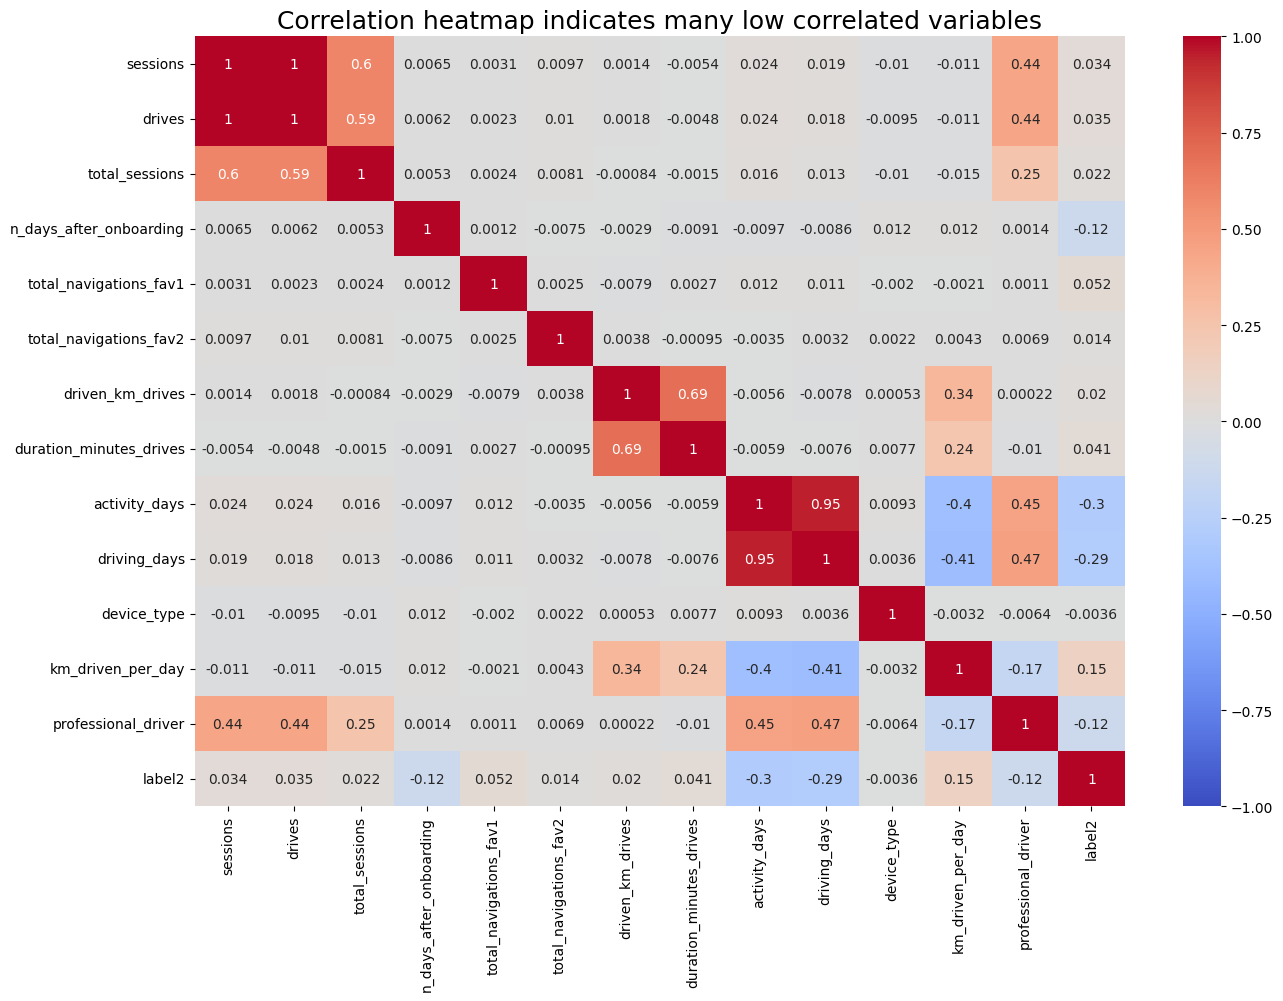

In [25]:
# Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(method='pearson', numeric_only=bool), vmin=-1, vmax=1, annot=True,
            cmap='coolwarm')
plt.title('Correlation heatmap indicates many low correlated variables',
          fontsize=18)
plt.show()

It is generally considered high collinearity if there are variables with a Pearson correlation value greater than the *absolute value of 0.7*, these variables are strongly multicollinear.

**Question:** Which variables are multicollinear with each other?

> * *`sessions` and `drives`: 1.0*
<br>
> * *`driving_days` and `activity_days`: 0.95*

### **Assumptions for Logistic Regression:**

* Independent Observation -- We will assume the data is independently collected
* No extreme outliers -- ✅
* Linear relationship between X and the **logit** of y -- Will be assessed after we build the model⭐

### Collinearity

Check the correlation among predictor avriables. First, generate a correlation matrix.

Now to plot a correlation heatmap

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in your model.


**Question:** Which variables are multicollinear with each other?

> * *`sessions` and `drives`: 1.0*
<br>
> * *`driving_days` and `activity_days`: 0.95*


### *Create dummies*

Since we selected *device* as an X variable, we will need to create dummy variables since this variable is categorical.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [26]:
# Create new device2 variable
df['device2'] = np.where(df['device']=='Android', 0, 1)
# Confirm the changes
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


#### **Assign predictor variables and target**

To build your model you need to determine what X variables you want to include in your model to predict your target&mdash;`label2`.

Drop the following variables and assign the results to `X`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [27]:
# isolate the preictor varibales
X = df.drop(columns=['label', 'label2', 'device', 'sessions', 'driving_days'])

y = df['label2']

#### **Split the data**

Use scikit-learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function to perform a train/test split on your data using the X and y variables you assigned above.

**Note 1:** It is important to do a train test to obtain accurate predictions.  You always want to fit your model on your training set and evaluate your model on your test set to avoid data leakage.

**Note 2:** Because the target class is imbalanced (82% retained vs. 18% churned), you want to make sure that you don't get an unlucky split that over- or under-represents the frequency of the minority class. Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [28]:
# perform the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [29]:
X_train.head()

,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,device_type,km_driven_per_day,professional_driver,device2
3483,50,90.468920,1039,0,15,6558.564887,1501.683515,2,2,0.000000,0,0
13354,45,243.720232,1480,0,35,5657.864872,4660.502879,13,2,471.488739,0,0
6059,48,61.511644,737,362,3,2575.235783,1407.662881,16,2,234.112344,0,0
198,13,186.979465,3306,184,32,905.681067,299.016399,10,2,90.568107,0,0
12381,2,124.305442,802,0,0,2813.451801,2021.436512,0,1,0.000000,0,1


Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = 'none'` since your predictors are unscaled.

Refer to scikit-learn's [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) documentation for more information.

Fit the model on `X_train` and `y_train`.

In [30]:
model= LogisticRegression(penalty=None, max_iter=400)
model.fit(X_train, y_train)

c:\Users\aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=400, penalty=None)

In [31]:
pd.Series(model.coef_[0], index= X.columns)

drives                     0.002373
total_sessions            -0.000006
n_days_after_onboarding   -0.000378
total_navigations_fav1     0.001189
total_navigations_fav2     0.001168
driven_km_drives          -0.000029
duration_minutes_drives    0.000130
activity_days             -0.100707
device_type               -0.027664
km_driven_per_day          0.000011
professional_driver        0.016666
device2                   -0.060343
dtype: float64

In [32]:
model.intercept_

array([-0.04400371])

#### **Check final assumption**

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [33]:
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.63514943, 0.36485057],
       [0.79823588, 0.20176412],
       [0.7910371 , 0.2089629 ],
       ...,
       [0.82759858, 0.17240142],
       [0.95656795, 0.04343205],
       [0.85262314, 0.14737686]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [34]:
logit_data = X_train.copy()
# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] /prob[0]) for prob in training_probabilities]

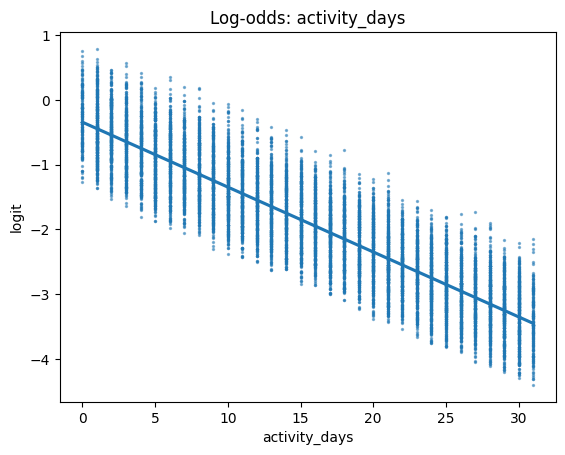

In [35]:
# Plot regplot of `activity_days` log-odds
sns.regplot(x='activity_days', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: activity_days');

If the logistic assumptions are met, the model results can be appropriately interpreted.

In [36]:
y_preds = model.predict(X_test)

Now, use the `score()` method on the model with `X_test` and `y_test` as its two arguments. The default score in scikit-learn is **accuracy**.  What is the accuracy of your model?

*Consider:  Is accuracy the best metric to use to evaluate this model?*

In [37]:
model.score(X_test, y_test)

0.8309333333333333

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

In [38]:
cm = confusion_matrix(y_test, y_preds)

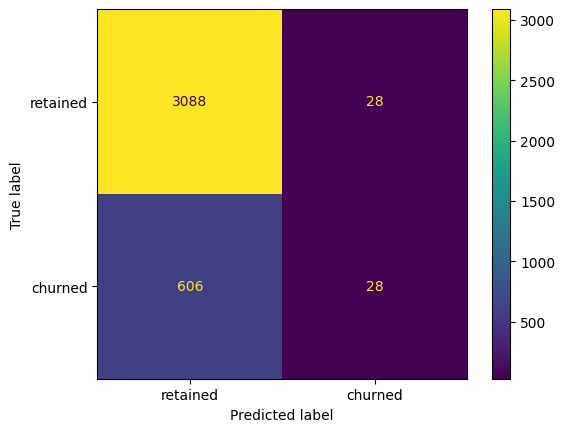

In [39]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['retained', 'churned'])
disp.plot()

You can use the confusion matrix to compute precision and recall manually. You can also use scikit-learn's [`classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function to generate a table from `y_test` and `y_preds`.

In [40]:
# Calculate precision manually\
precision = cm[1,1] / (cm[0,1] + cm[1,1])
print(precision)

# Calculate the recall manually
recall = cm[1,1] / (cm[1,0] + cm[1,1])
print(recall)

# Calculate a classification report
target_labels = ['retained', 'churned']
print(classification_report(y_test, y_preds, target_names=target_labels))

0.5
0.04416403785488959
              precision    recall  f1-score   support

    retained       0.84      0.99      0.91      3116
     churned       0.50      0.04      0.08       634

    accuracy                           0.83      3750
   macro avg       0.67      0.52      0.49      3750
weighted avg       0.78      0.83      0.77      3750



**Note:** The model has mediocre precision and very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.


Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [41]:
# Create a list of column name & coefficients
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('professional_driver', 0.016666325458783722),
 ('drives', 0.0023728151809398385),
 ('total_navigations_fav1', 0.0011893741619380083),
 ('total_navigations_fav2', 0.0011675459168242312),
 ('duration_minutes_drives', 0.00013027561007526275),
 ('km_driven_per_day', 1.0523655842037248e-05),
 ('total_sessions', -5.8886323574381526e-06),
 ('driven_km_drives', -2.9321834193358212e-05),
 ('n_days_after_onboarding', -0.0003778342606354757),
 ('device_type', -0.027664494491784795),
 ('device2', -0.060342920116026336),
 ('activity_days', -0.10070736159291688)]

Text(0.5, 1.0, 'feature_importance')

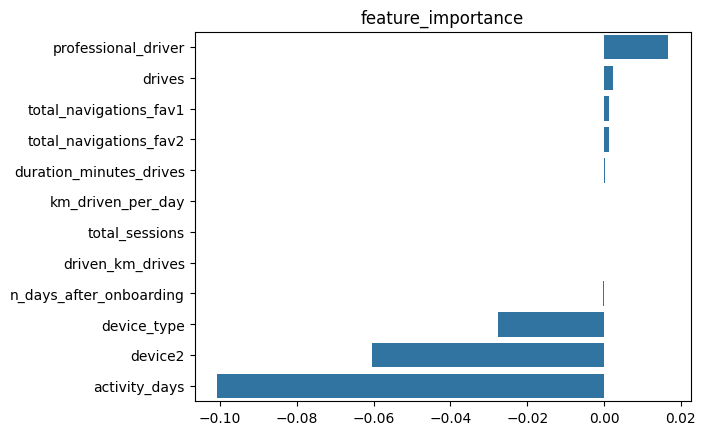

In [42]:
# Plot the feature importance
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('feature_importance')

1. What variable most influenced the model's prediction? How? Was this surprising?

> _`activity_days` was by far the most important feature in the model. It had a negative correlation with user churn. This was not surprising, as this variable was very strongly correlated with `driving_days`, which was known from EDA to have a negative correlation with churn._



# **Course 6 End-of-Course Project: Build a machine learning model**

In this activity, you will practice using tree-based modeling techniques to predict on a binary target class.
<br/>

**The purpose** of this model is to find factors that drive user churn.

**The goal** of this model is to predict whether or not a Waze user is retained or churned.
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



In [43]:
# import packages and libraries
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

# import packages for data modeling
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# This is the function that helps plot feature importance
from xgboost import plot_importance

# This module lets us save our models once we fit them
import pickle

In [44]:
df0 = df.copy()
df0.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,device_type,km_driven_per_day,professional_driver,label2,device2
0,retained,243,201,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,2,138.360267,1,0,0
1,retained,133,107,326.896596,1225,19,64,8889.794236,3160.472914,13,11,iPhone,1,1246.901868,0,0,1
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,2,382.393602,0,0,0
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,1,304.530374,0,0,1
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,2,219.455667,1,0,0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   label                    14299 non-null  object 
 1   sessions                 14999 non-null  int64  
 2   drives                   14999 non-null  int64  
 3   total_sessions           14999 non-null  float64
 4   n_days_after_onboarding  14999 non-null  int64  
 5   total_navigations_fav1   14999 non-null  int64  
 6   total_navigations_fav2   14999 non-null  int64  
 7   driven_km_drives         14999 non-null  float64
 8   duration_minutes_drives  14999 non-null  float64
 9   activity_days            14999 non-null  int64  
 10  driving_days             14999 non-null  int64  
 11  device                   14999 non-null  object 
 12  device_type              14999 non-null  int64  
 13  km_driven_per_day        14999 non-null  float64
 14  professional_driver   

In [46]:
df.km_driven_per_day.describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: km_driven_per_day, dtype: float64

#### **`percent_sessions_in_last_month`**

1. Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

2. Get descriptive statistics for this new feature

In [47]:
# Create percent sessions in last month as a column
df['percent_sessions_in_last_month'] = df['sessions'] / df['total_sessions']

# Get descriptive stats
df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.443563
std          0.278569
min          0.000000
25%          0.199616
50%          0.427184
75%          0.664844
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

#### **`total_sessions_per_day`**

Now, create a new column that represents the mean number of sessions per day _since onboarding_.

In [48]:
# create 'total_sessions_per_day' feature
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']

df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.329679
std          1.279856
min          0.000298
25%          0.051037
50%          0.100775
75%          0.209712
max         39.763874
Name: total_sessions_per_day, dtype: float64

#### **`km_per_hour`**

Create a column representing the mean kilometers per hour driven in the last month.

In [49]:
# create 'km_per_hr' feature
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14999.000000
mean       189.123436
std        322.431611
min         72.013095
25%         92.937040
50%        121.492474
75%        191.015037
max      21800.540069
Name: km_per_hour, dtype: float64

These numbers are obviously problematic, & it would be worthwhile to seek more clarification, how some drivers were able to achieve such unrealistic/high speeds.

#### **`km_per_drive`**

Create a column representing the mean number of kilometers per drive made in the last month for each user. Then, print descriptive statistics for the feature.

In [50]:
# Creaste 'km_per_drive' feature
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

c:\Users\aditya\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.361484e+01
50%      7.424638e+01
75%      1.828004e+02
max               inf
Name: km_per_drive, dtype: float64

In [51]:
# Converting the infinite values
df.loc[df['km_per_drive']== np.inf, 'km_per_drive'] = 0

# Confirm that it worked
df['km_per_drive'].describe()

count    14999.000000
mean       226.424311
std        578.656980
min          0.000000
25%         32.848406
50%         72.273118
75%        177.571053
max       8889.794236
Name: km_per_drive, dtype: float64

#### **`percent_of_sessions_to_favorite`**

Finally, create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [52]:
# Create 'percent_of_sessions_to_fvrt' feature
df['percent_of-sessions_to_favorite'] = (df['total_navigations_fav1'] + df['total_navigations_fav2']) / df['total_sessions']

df['percent_sessions_in_last_month'].describe()

count    14999.000000
mean         0.443563
std          0.278569
min          0.000000
25%          0.199616
50%          0.427184
75%          0.664844
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

Tree based models such as Random Forest are resistent to outliers.

In [53]:
df[['device', 'device2']].tail()

,device,device2
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


In [54]:
df[['label', 'label2']].tail()

,label,label2
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


### **Task Evaluation metric**

Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, examine the class balance of your target variable.

In [55]:
df['label'].value_counts(normalize=True)
df.label.dropna()
df.label.count()

14299

Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

### **Task 8. Modeling workflow and model selection process**

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.

2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

In [56]:
# Isolate X variables
X = df.drop(columns=['label', 'label2', 'device'])

# Isolate y variable
y = df['label2']

# Split the data into train_test_split
X_tr, X_test, y_tr, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Split the data into train & validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, stratify=y_tr, test_size=0.25, random_state=42)

In [57]:
for x in [X_train, X_val, X_test]:
    print(len(x))

8999
3000
3000


### **Task 10. Modeling**

#### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a list `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>



In [58]:
rf = RandomForestClassifier(random_state=42)

cv_params = {
    'max_depth': [None],
    'max_features': [1.0],
    'max_samples':[1.0],
    'min_samples_leaf':[2],
    'min_samples_split': [2],
    'n_estimators': [300],
}

scoring = ['accuracy', 'precision', 'recall', 'f1']
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='recall')

Now, lets fit the model

In [59]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 19.3 s
Wall time: 2min 27s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

Examine the best average score across all the validation folds.

In [60]:
# Exanmine the best average score
rf_cv.best_score_

0.11695848874153889

Examine the best combination of hyperparameters.

In [61]:
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [86]:
def make_results(model_name:str, model_object, metric:str):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                   'recall':'mean_test_recall',
                   'f1': 'mean_test_fit',
                   'accuracy':'mean_test_accuracy'}
    
    # Get all the results from cv and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract accuracy, precision, recall, & f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # create table of results
    table = pd.DataFrame({
        'model': [model_name],
        'precision':[precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy],
    }, )

    return table

Lets test the function by passing the GridSearch object to the make_results() function.


In [87]:
results = make_results('RF cv', rf_cv, 'recall')
results

,model,precision,recall,F1,accuracy
0,RF cv,0.500726,0.116958,0.189051,0.830537


Asside from the accuracy, the scores aren't that good. However, recall that when you built the logistic regression model in the last course the recall was \~0.09, which means that this model has 33% better recall and about the same accuracy, and it was trained on less data.

#### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a list `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [88]:
xgb = XGBClassifier(objective='binary:logistic', random_state = 42)

# create a dictionary
cv_params = {
    'max_depth': [6,12],
    'min_child_weight': [3,5],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [300]
}

# Define a list of scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [89]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 4min 20s
Wall time: 22.4 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [90]:
# Get the score from this model
xgb_cv.best_score_

0.1596525763226965

In [91]:
# ANd thene the best performer
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 12,
 'min_child_weight': 5,
 'n_estimators': 300}

Use 'make_results()' function to output all of the scores of your model. Note that the functuon aceepts three arguments.

In [92]:
xgb_cv_results = make_results('XGB cv', xgb_cv, 'recall')
results = pd.concat([results, xgb_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.500726,0.116958,0.189051,0.830537
0,XGB cv,0.401889,0.159653,0.228385,0.817646


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous course, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

### **Task Model Selction**

#### **Random Forest**

In [93]:
rf_val_preds = rf_cv.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [94]:
def get_test_scores(model_name:str, preds, y_test_data):
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy]
                          })

    return table

In [95]:
# Get validation scores for the RF model
rf_val_scores = get_test_scores('RF val', rf_val_preds, y_val)

# Append to the results
results = pd.concat([results, rf_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.500726,0.116958,0.189051,0.830537
0,XGB cv,0.401889,0.159653,0.228385,0.817646
0,RF val,0.433333,0.102564,0.165869,0.825667


#### **XGBoost**

Now, do the same thing to get the performance scores of the XGBoost model on the validation data.

In [96]:
xgb_val_preds = xgb_cv.best_estimator_.predict(X_val)
xgb_val_scores = get_test_scores('XGB val', xgb_val_preds, y_val)

# Append the results to the table
results = pd.concat([results, xgb_val_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.500726,0.116958,0.189051,0.830537
0,XGB cv,0.401889,0.159653,0.228385,0.817646
0,RF val,0.433333,0.102564,0.165869,0.825667
0,XGB val,0.329787,0.122288,0.178417,0.809667


### **Task Use champion model to predict on test data**

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [97]:
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

xgb_test_scores = get_test_scores('XGB test', xgb_test_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF cv,0.500726,0.116958,0.189051,0.830537
0,XGB cv,0.401889,0.159653,0.228385,0.817646
0,RF val,0.433333,0.102564,0.165869,0.825667
0,XGB val,0.329787,0.122288,0.178417,0.809667
0,XGB test,0.368159,0.145957,0.209040,0.813333


The recall was exactly the same as it was on the validation data, but the precision declined notably, which caused all of the other scores to drop slightly. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

### **Task 13. Confusion matrix**

Plot a confusion matrix of the champion model's predictions on the test data.

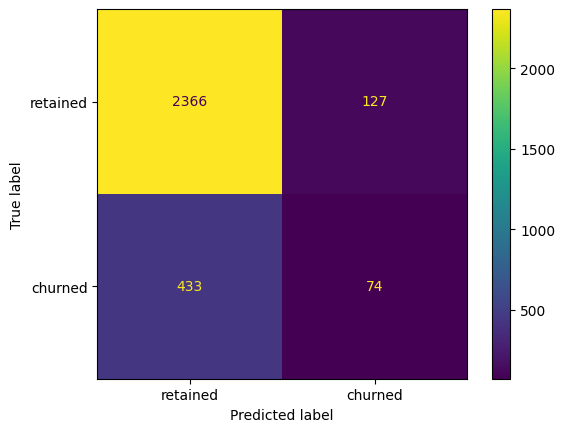

In [99]:
cm = confusion_matrix(y_test, xgb_test_preds, labels = xgb_cv.classes_)

# pLotting the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['retained', 'churned'])
disp.plot()

The model predicted over three times as many false negatives than it did false positives, and it correctly identified only 18.1% of the users who actually churned.

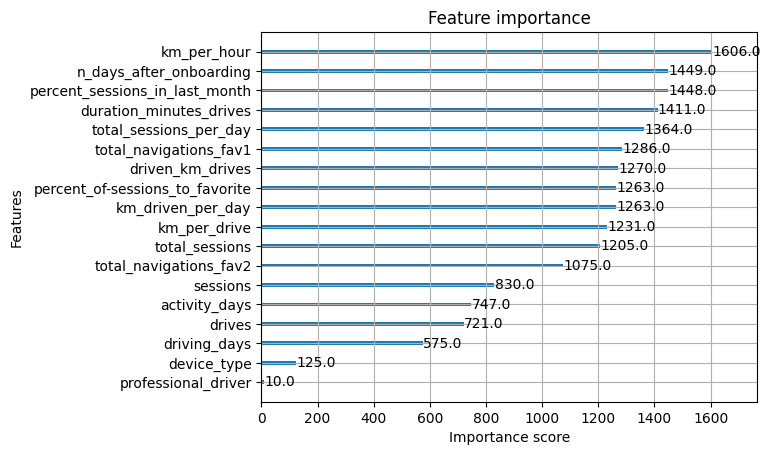

In [102]:
# Featuere importance
plot_importance(xgb_cv.best_estimator_);

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders?

### **Conclusion**

### **Task 15. Conclusion**

Now that you've built and tested your machine learning models, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Would you recommend using this model for churn prediction? Why or why not?

> _It depends. What would the model be used for? If it's used to drive consequential business decisions, then no. The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value._

2. What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets?

> _Splitting the data three ways means that there is less data available to train the model than splitting just two ways. However, performing model selection on a separate validation set enables testing of the champion model by itself on the test set, which gives a better estimate of future performance than splitting the data two ways and selecting a champion model by performance on the test data._

3. What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks?

> _Logistic regression models are easier to interpret. Because they assign coefficients to predictor variables, they reveal not only which features factored most heavily into their final predictions, but also the directionality of the weight. In other words, they tell you if each feature is positively or negatively correlated with the target in the model's final prediction._

4. What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks?

> _Tree-based model ensembles are often better predictors. If the most important thing is the predictive power of the model, then tree-based modeling will usually win out against logistic regression (but not always!). They also require much less data cleaning and require fewer assumptions about the underlying distributions of their predictor variables, so they're easier to work with._

5. What could you do to improve this model?

> _New features could be engineered to try to generate better predictive signal, as they often do if you have domain knowledge. In the case of this model, the engineered features made up over half of the top 10 most-predictive features used by the model. It could also be helpful to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features._

6. What additional features would you like to have to help improve the model?

> _It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs._
